# Setup

In [1]:
import scanpy as sc
import scvi
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

Global seed set to 0


In [2]:
sc.set_figure_params(figsize=(4,4),  dpi=150, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams["axes.grid"] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
os.getcwd()

'/notebook/Joe/M-cells/code'

# import data

In [4]:
adata = sc.read("/notebook/External/Archive/Joe/processed_data/M_cell/h5ad_files/combined_WT_3008_genes.h5ad")
model = scvi.model.SCVI.load("/notebook/External/Archive/Joe/processed_data/M_cell/scVI_models/combined_WT_3008_genes", adata=adata, use_gpu=True)

INFO     File /notebook/External/Archive/Joe/processed_data/M_cell/scVI_models/combined_WT_30
         08_genes/model.pt already downloaded                                                


In [5]:
adata.obs

,batch,scrublet_score,scrublet_called_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,_scvi_batch,_scvi_labels,leiden_scVI,cell_type
AAACCCAAGCCACCGT-1,Corey,0.061150,False,4330,22888.0,411.0,1.795701,4330,0,0,1,Late Aire
AAACCCAAGCTGCCAC-1,Corey,0.088096,False,2657,7073.0,297.0,4.199067,2657,0,0,9,cTECs
AAACCCACACGTAGAG-1,Corey,0.088096,False,4818,20949.0,1606.0,7.666237,4818,0,0,1,Late Aire
AAACCCACACTCCCTA-1,Corey,0.116656,False,2066,6615.0,80.0,1.209373,2066,0,0,1,Late Aire
AAACCCACATTGACTG-1,Corey,0.077549,False,3973,12769.0,573.0,4.487431,3973,0,0,4,PA1 (Tspan8)
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGGGTCTC-1,Yi,0.064776,False,4534,20422.0,575.0,2.815591,4534,1,0,3,Aire+ 1
TTTGTTGCAGTATGAA-1,Yi,0.094163,False,2455,7366.0,217.0,2.945968,2455,1,0,8,PA2 (Ascl1)
TTTGTTGGTACGTTCA-1,Yi,0.085275,False,3989,11545.0,358.0,3.100909,3989,1,0,5,Ccl21a+
TTTGTTGGTCAGGCAA-1,Yi,0.091056,False,3079,12522.0,280.0,2.236064,3079,1,0,0,Aire+ 2


In [6]:
de_df = model.differential_expression(
    groupby="cell_type",
)

DE...: 100%|██████████| 11/11 [00:08<00:00,  1.25it/s]


In [7]:
de_df

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
Krtap31-1,0.9894,0.0106,4.536244,0.000021,2.464220e-07,0.0,0.25,9.362860,9.535562,7.097024,...,0.026851,0.000000,0.002301,0.000000,0.069392,0.000000,True,Aire+ 2 vs Rest,Aire+ 2,Rest
Olfr881,0.9892,0.0108,4.517349,0.000015,2.376180e-07,0.0,0.25,8.076717,7.999997,5.348039,...,0.016110,0.000000,0.004987,0.000000,0.039628,0.000000,True,Aire+ 2 vs Rest,Aire+ 2,Rest
Usp17lb,0.9874,0.0126,4.361378,0.000015,4.496750e-07,0.0,0.25,7.722150,7.645649,7.506849,...,0.017645,0.000979,0.001534,0.000122,0.061232,0.003696,True,Aire+ 2 vs Rest,Aire+ 2,Rest
Gm36529,0.9872,0.0128,4.345427,0.000028,1.365425e-06,0.0,0.25,8.052033,7.969007,5.854152,...,0.032988,0.000245,0.010357,0.000245,0.117876,0.000708,True,Aire+ 2 vs Rest,Aire+ 2,Rest
Gm34785,0.9868,0.0132,4.314250,0.000027,1.256550e-06,0.0,0.25,9.328524,9.734465,6.685828,...,0.014960,0.001468,0.006904,0.000489,0.052362,0.008943,True,Aire+ 2 vs Rest,Aire+ 2,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Glud1,0.8338,0.1662,1.612802,0.000552,7.792483e-04,0.0,0.25,-0.330905,-0.265404,1.332806,...,1.275863,1.742347,0.701149,0.628764,4.174331,8.025612,False,PA4 (Foxj1) vs Rest,PA4 (Foxj1),Rest
Gltp,0.8274,0.1726,1.567311,0.000322,5.035995e-04,0.0,0.25,-0.324465,-0.166062,1.423925,...,0.402299,1.536821,0.264368,0.511595,1.484379,5.332461,False,PA4 (Foxj1) vs Rest,PA4 (Foxj1),Rest
Tmcc1,0.8272,0.1728,1.565912,0.000197,2.358861e-04,0.0,0.25,-0.359635,-0.298771,1.194051,...,0.632184,0.572761,0.459770,0.369085,2.384993,2.631304,False,PA4 (Foxj1) vs Rest,PA4 (Foxj1),Rest
Rcn2,0.8184,0.1816,1.505545,0.000391,3.823678e-04,0.0,0.25,0.093473,0.062897,1.133068,...,0.781609,0.782426,0.494253,0.443426,2.893876,3.721857,False,PA4 (Foxj1) vs Rest,PA4 (Foxj1),Rest


In [8]:
markers = {}
cats = adata.obs.cell_type.cat.categories
for i, c in enumerate(cats):
    print(f"Saving {c} DE genes")
    cid = f"{c} vs Rest"
    cell_type_df = de_df.loc[de_df.comparison == cid]
    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]
    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 2.5]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.1]
    markers[c] = cell_type_df
    cell_type_df.to_csv(f"/notebook/Joe/M-cells/analysis/DE_all_cell_types/{c}_marker_genes.csv")

Saving Aire+ 2 DE genes
Saving Late Aire DE genes
Saving Tuft DE genes
Saving Aire+ 1 DE genes
Saving PA1 (Tspan8) DE genes
Saving Ccl21a+ DE genes
Saving TAC-TECs DE genes
Saving PA3 (Gp2) DE genes
Saving PA2 (Ascl1) DE genes
Saving cTECs DE genes
Saving PA4 (Foxj1) DE genes


# M cell signature

In [9]:
McellGenes = set(
    ["Ccl20", "Clu", "Mfge8", "Anxa5", "Pglyrp1", "Ctsh", "Serpinb6a", "H2-M2", "Gp2", "Ubd", "Lamp1", "Cxcl16", "Cyba", "Scd1", "1700011H14Rik", "Aif1", "Ctsd",
    "Tnfaip2", "Far2os2", "Slc2a6", "Adgrd1", "Ncf4", "Rnf128", "Il4i1", "Far2", "BC021614", "D630011A20Rik", "Vcam1", "Stx11", "Sdhaf1", "Ces1b", "Itga3", "Msln",
    "Scarb2", "Tnfrsf4", "Fam98a", "Tmsb4x", "Nfkbia", "Rnase1", "Vamp5", "Gulo", "Ccl9", "Serpinb1a", "Serpinb6a", "Tnfaip2", "1700011H14Rik", "Ccl6", "Ly6a", "Anxa5",
    "Spib", "Ctsh", "Fabp5", "Ccl20", "Pglyrp1", "Tmsb4x", "Rac2", "Dnase1", "Smpdl3a", "Far2os2", "Rras2", "Nqo2", "Gjb2", "1110046J04Rik", "Npc2", "Atp6v1c1", 
    "Marcksl1", "Psmb7", "Psg27", "AI118078", "Brk1", "Msln", "Tnfrsf4", "Cd63", "Rnf181", "Sox8", "Pon2", "Bcl2a1d", "Rassf2", "Aif1", "1700025G04Rik", "C4bp", "Vamp8",
    "Prr13", "Bmp2", "Rps6kl1", "Degs2", "9130008F23Rik", "Il4i1", "Gm5549", "Npdc1", "Gp2", "H2-M2", "Vamp5", "Impa1", "Gpa33", "Cnp", "Dapk2", "Rasd1", "Etfa", 
    "Mocs1", "Slc2a6", "Hars", "Stk24", "Fam131a", "Snhg18", "Pold1", "Agps", "Bcl2a1b", "Zfp36l1", "Btbd16", "Mylk", "Cpt2", "Ahcyl2", "Ier5"]
)

In [10]:
len(McellGenes)

97

In [11]:
sc.tl.score_genes(adata, gene_list=McellGenes, score_name="M_cell_enrichment")

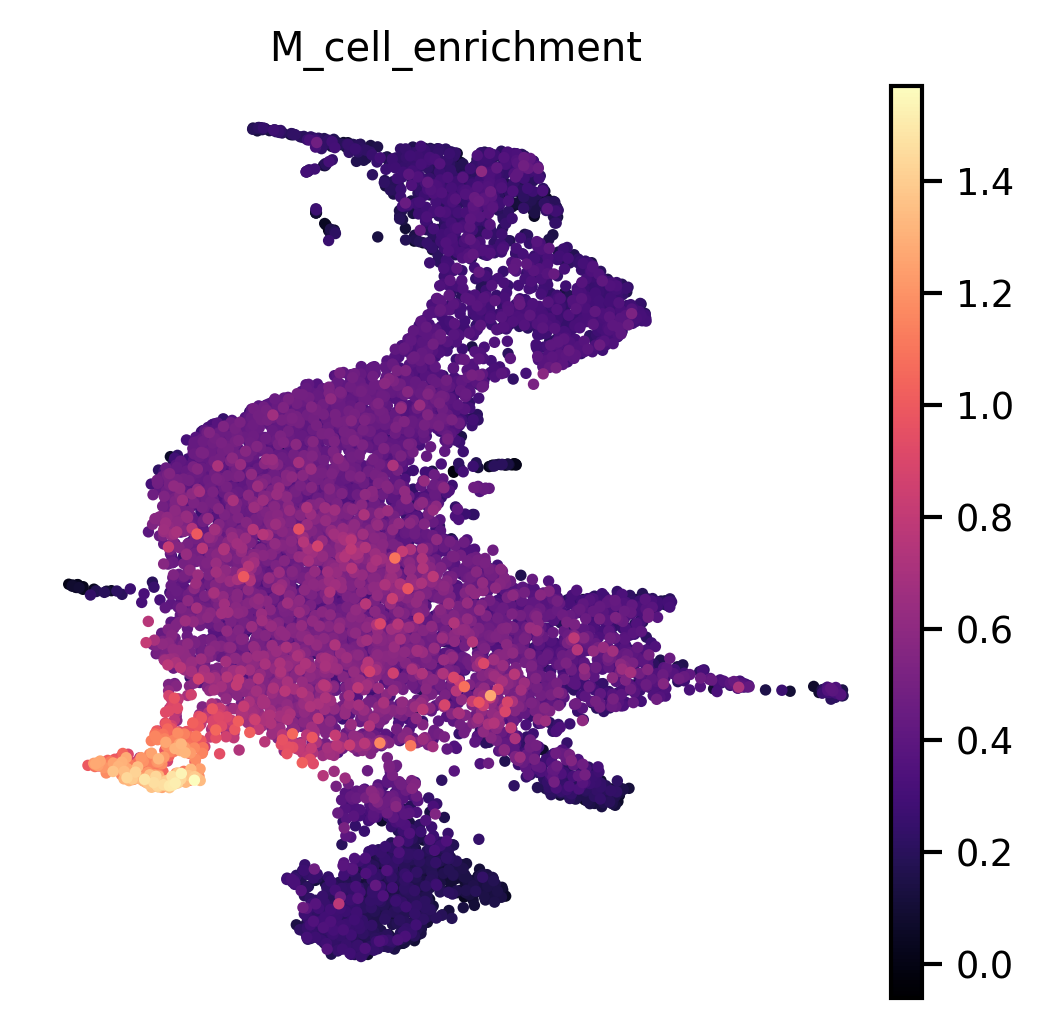

In [12]:
sc.pl.umap(
    adata,
    color="M_cell_enrichment",
    cmap="magma",
    s=30,
)

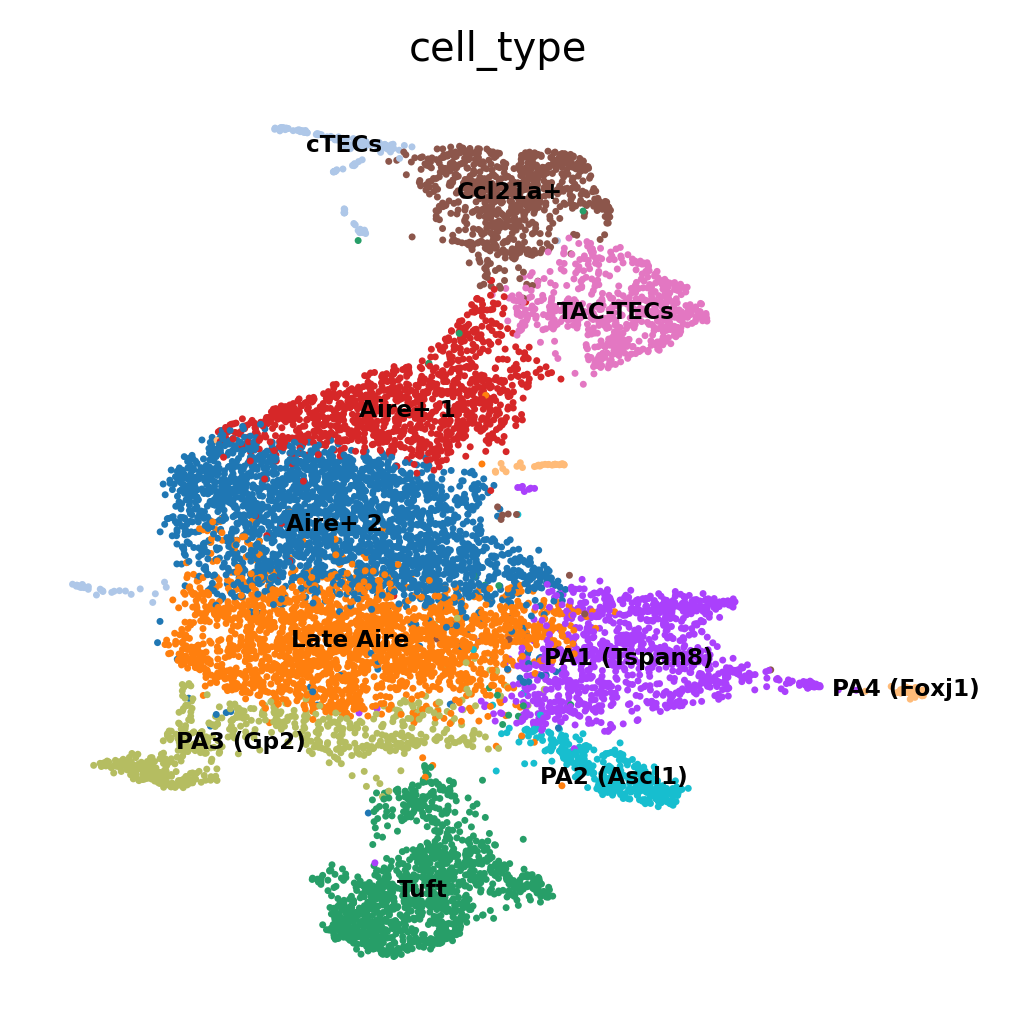

In [13]:
sc.pl.umap(
    adata,
    color=["cell_type"],
    legend_loc="on data",
    legend_fontsize="xx-small",
)

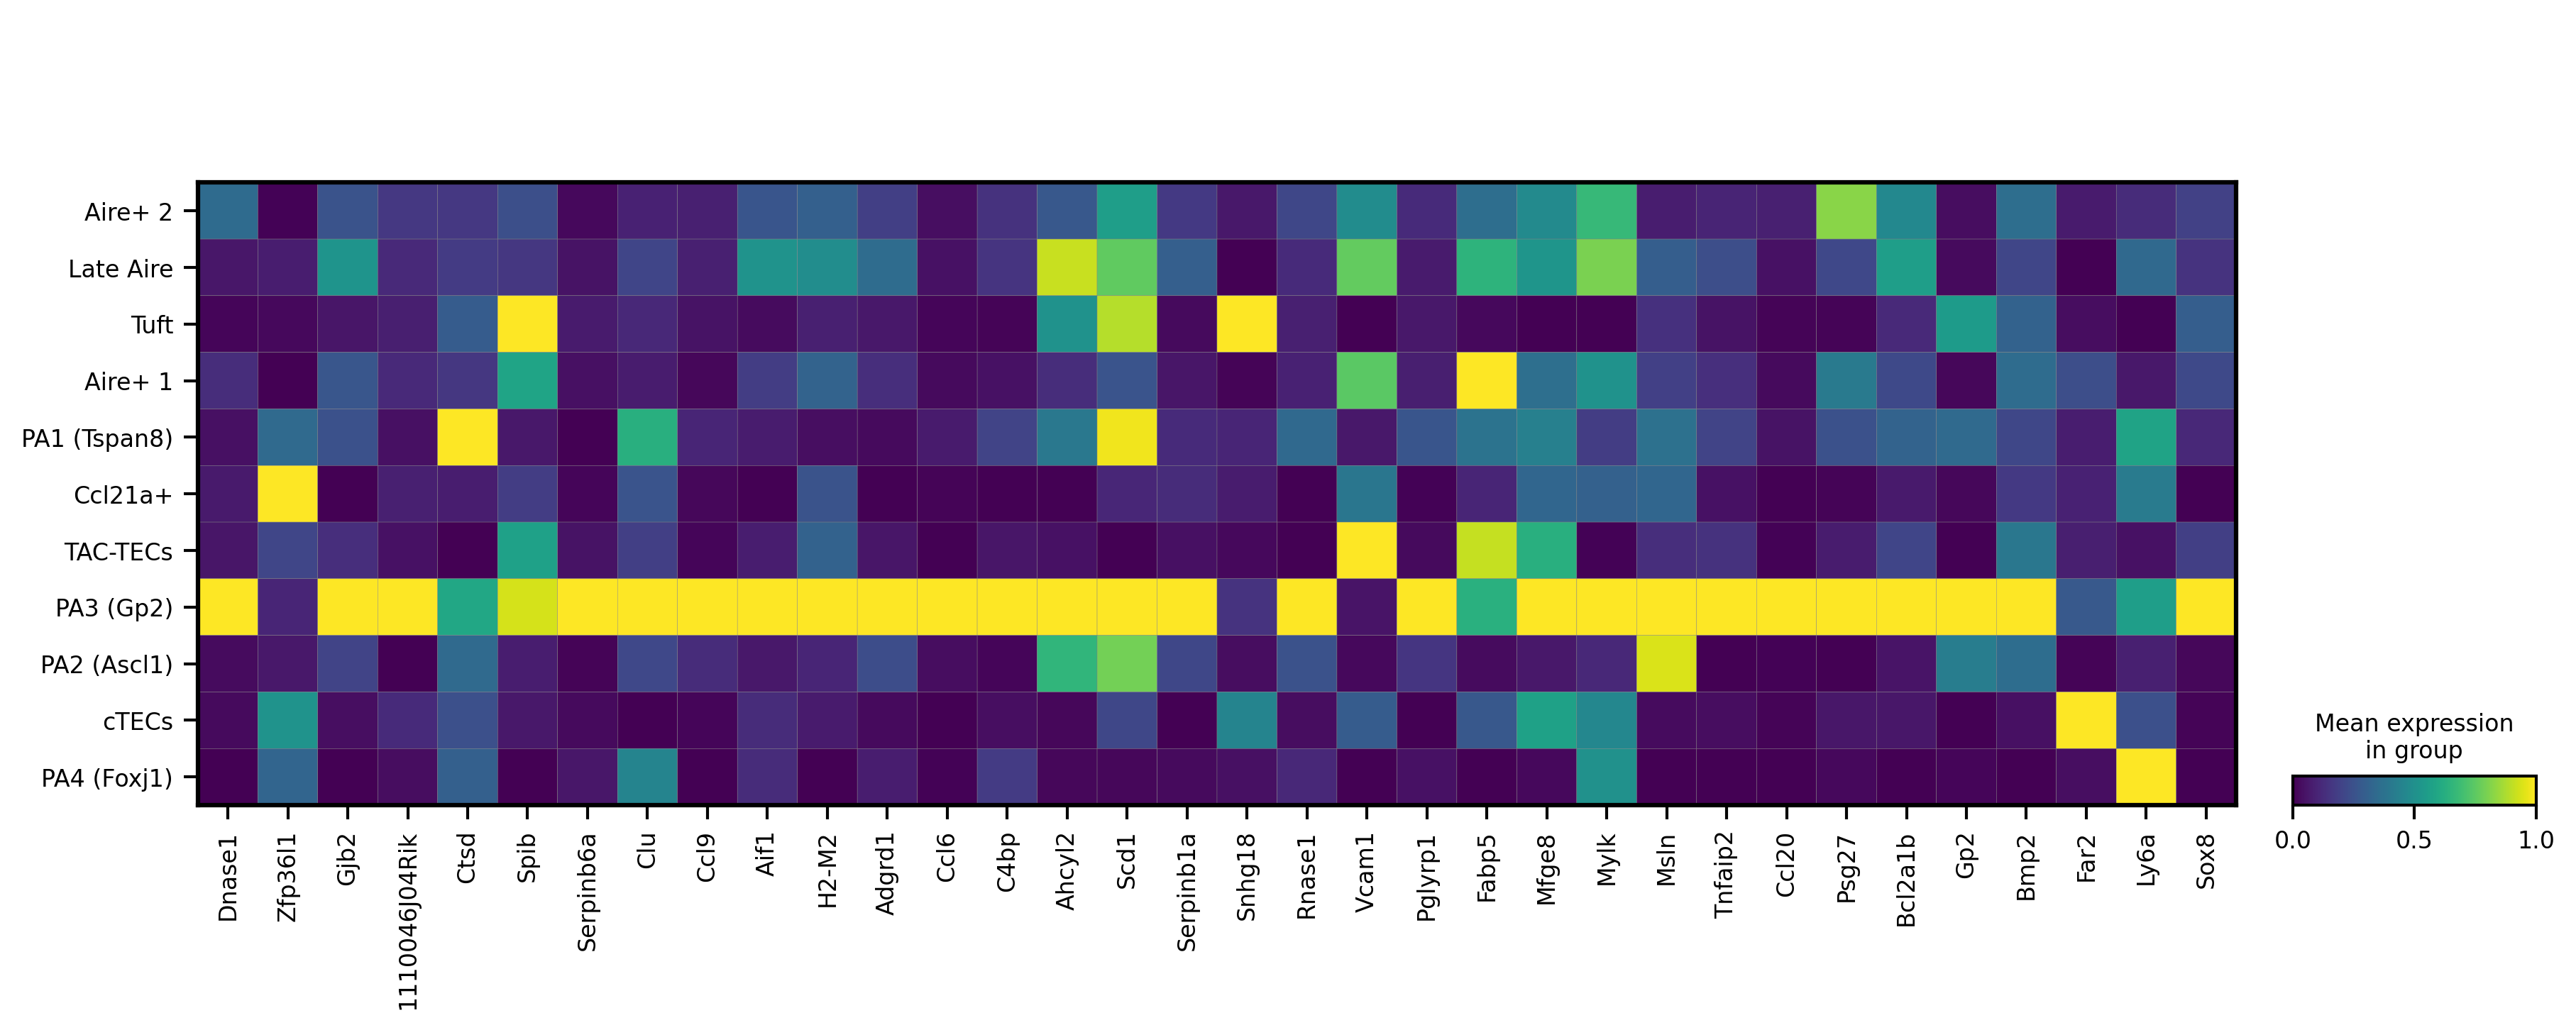

In [22]:
sc.pl.matrixplot(
    adata,
    var_names=[i for i in McellGenes if i in adata.var_names],
    groupby="cell_type",
    standard_scale="var",
    use_raw=False,
    layer="scVI_normalized",
)

## DE comparison

In [17]:
McellDE = pd.read_csv("/notebook/Joe/M-cells/analysis/DE_all_cell_types/PA3 (Gp2)_marker_genes.csv", index_col=0)

In [18]:
McellDE["rank"] = [i for i in range(1,len(McellDE)+1)]
McellDE

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2,rank
Clca4b,0.9880,0.0120,4.410775,0.001464,0.000093,0.0,0.25,5.191709,5.136548,2.784412,...,0.071281,0.291946,0.017869,8.350575,0.211184,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,1
2200002D01Rik,0.9836,0.0164,4.093937,0.003563,0.000508,0.0,0.25,3.234689,3.324256,1.598747,...,1.482566,0.944631,0.385960,43.430416,5.278213,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,2
Ccl6,0.9816,0.0184,3.976833,0.004977,0.000183,0.0,0.25,4.699795,4.790945,2.877371,...,0.248797,0.552013,0.064801,51.068783,0.771198,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,3
Muc13,0.9802,0.0198,3.902074,0.003028,0.000374,0.0,0.25,3.792887,3.810583,2.125650,...,0.675688,0.859060,0.161905,28.863900,2.235958,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,4
Ccl20,0.9792,0.0208,3.851782,0.013903,0.000680,0.0,0.25,4.589459,4.691077,2.984720,...,2.162505,0.781879,0.223859,203.085080,7.204190,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cib3,0.9248,0.0752,2.509426,0.000426,0.000263,0.0,0.25,1.438436,1.547137,1.962089,...,0.329992,0.201342,0.119882,2.158010,1.554553,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,208
Abcg2,0.9246,0.0754,2.506554,0.000227,0.000164,0.0,0.25,0.704966,0.629314,2.456884,...,0.178105,0.263423,0.084045,2.086118,0.738425,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,209
Cdh9,0.9246,0.0754,2.506554,0.000279,0.000262,0.0,0.25,0.129551,0.230231,2.500779,...,0.559735,0.303691,0.184192,2.942308,2.513587,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,210
Gpr183,0.9244,0.0756,2.503688,0.000407,0.000171,0.0,0.25,1.339461,1.295144,2.315244,...,0.217575,0.167785,0.080805,2.473921,1.036345,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,211


In [19]:
mCellGenesInData = [i for i in McellGenes if i in adata.var_names]

In [20]:
len(mCellGenesInData)

34

In [21]:
McellDE[McellDE.index.isin(mCellGenesInData)]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2,rank
Ccl6,0.9816,0.0184,3.976833,0.004977,0.000183,0.0,0.25,4.699795,4.790945,2.877371,...,0.248797,0.552013,0.064801,51.068783,0.771198,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,3
Ccl20,0.9792,0.0208,3.851782,0.013903,0.000680,0.0,0.25,4.589459,4.691077,2.984720,...,2.162505,0.781879,0.223859,203.085080,7.204190,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,5
C4bp,0.9790,0.0210,3.842009,0.000556,0.000073,0.0,0.25,3.621605,3.623518,2.277648,...,0.062248,0.347315,0.035837,3.494280,0.219033,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,6
Ccl9,0.9780,0.0220,3.794467,0.003584,0.000261,0.0,0.25,4.114039,4.167164,2.351414,...,0.470686,0.791946,0.135690,39.887600,1.579605,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,7
Serpinb1a,0.9600,0.0400,3.178054,0.016645,0.002719,0.0,0.25,2.910551,2.854506,2.099142,...,7.933087,0.976510,0.699656,203.800350,30.894540,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,33
Gp2,0.9572,0.0428,3.107474,0.004737,0.000668,0.0,0.25,2.879794,2.837627,3.451069,...,1.921659,0.442953,0.169563,63.468880,7.604229,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,45
Adgrd1,0.9508,0.0492,2.961410,0.001564,0.000280,0.0,0.25,2.699666,2.697630,2.326565,...,0.535286,0.602349,0.205106,16.271520,2.379434,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,65
Sox8,0.9502,0.0498,2.948657,0.000481,0.000098,0.0,0.25,2.288724,2.332682,2.627881,...,0.109966,0.429530,0.077860,4.271454,0.540781,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,67
Serpinb6a,0.9486,0.0514,2.915349,0.016034,0.001348,0.0,0.25,2.736768,2.630976,2.216138,...,3.146302,0.954698,0.764556,182.746800,14.038151,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,71
Gjb2,0.9454,0.0546,2.851574,0.003749,0.001039,0.0,0.25,2.308976,2.159922,1.868261,...,2.424455,0.869128,0.484340,40.216938,9.875252,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,83
